In [6]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')
import numpy as np
from scripts.data import  get_complete_dataframes
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('plot.mplstyle')
%config InlineBackend.figure_format = 'retina'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
complete_cg_df, complete_a_df = get_complete_dataframes(energy_cutoff=1)

In [8]:
all_structures = complete_a_df.values.flatten().tolist()

all_structures = [s for s in all_structures if str(s) != 'nan']

In [9]:
import itertools

def generate_neighbour_triples(central_atom, neighbor_indices):
    triples = []
    for neighbor1, neighbor2 in itertools.combinations(neighbor_indices, 2):
        triples.append((neighbor1, central_atom, neighbor2))
    return triples

def generate_neighbour_doubles(central_atom, neighbor_indices):
    doubles = []
    for neighbor in neighbor_indices:
        doubles.append((central_atom, neighbor))
    return doubles

In [10]:
from ase import neighborlist

zn_angles = []
all_angles = []
zn_n_bond_lengths = []
all_bond_lengths = []
for struct in all_structures:
    nl = neighborlist.build_neighbor_list(struct,self_interaction=False)
    zn_atoms, = np.where(struct.get_atomic_numbers() == 30)
    n_atoms, = np.where(struct.get_atomic_numbers() == 7)
    
    for central_atom in range(len(struct)):
        neighbor_indices,_ = nl.get_neighbors(central_atom)
        triples = generate_neighbour_triples(central_atom, neighbor_indices)
        doubles = generate_neighbour_doubles(central_atom, neighbor_indices)

        for i in triples:
            a = struct.get_angle(*i, mic=True)
            all_angles.append(a)
            if central_atom in zn_atoms:
                zn_angles.append(a)
            
        for j in doubles:
            d = struct.get_distance(*j, mic=True)
            all_bond_lengths.append(d)
            if central_atom in zn_atoms:
                zn_n_bond_lengths.append(d)
        

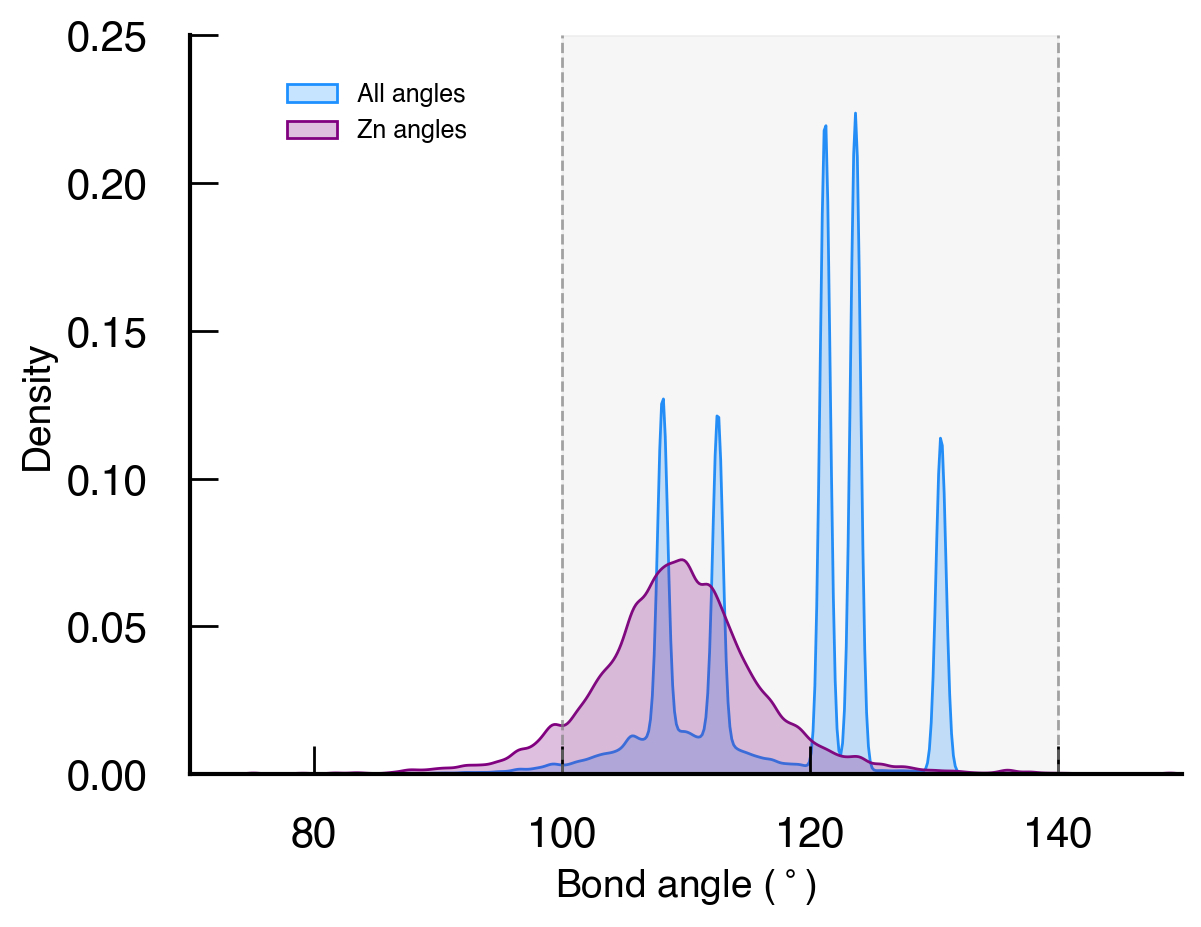

In [11]:

sns.kdeplot(all_angles,fill=True,color='dodgerblue',label='All angles',gridsize=1000)
sns.kdeplot(zn_angles,fill=True,color='purple',label='Zn angles',gridsize=1000)

plt.xlabel('Bond angle ($^\circ$)',fontsize=14)
plt.ylabel('Density',fontsize=14)

plt.xlim(70,150)

plt.vlines(100,0,0.25,linestyle='--',color='grey',alpha=0.7,linewidth=1)
plt.vlines(140,0,0.25,linestyle='--',color='grey',alpha=0.7,linewidth=1)
plt.ylim(0,0.25)
plt.legend(loc='upper left',fontsize=9,frameon=False,bbox_to_anchor=(0.05, 1))

# fill between the two horizontal lines
plt.fill_between([100,140],0,0.25,color='grey',alpha=0.07)
sns.despine()
# plt.savefig('../figures/angle_distributions.pdf',bbox_inches='tight')

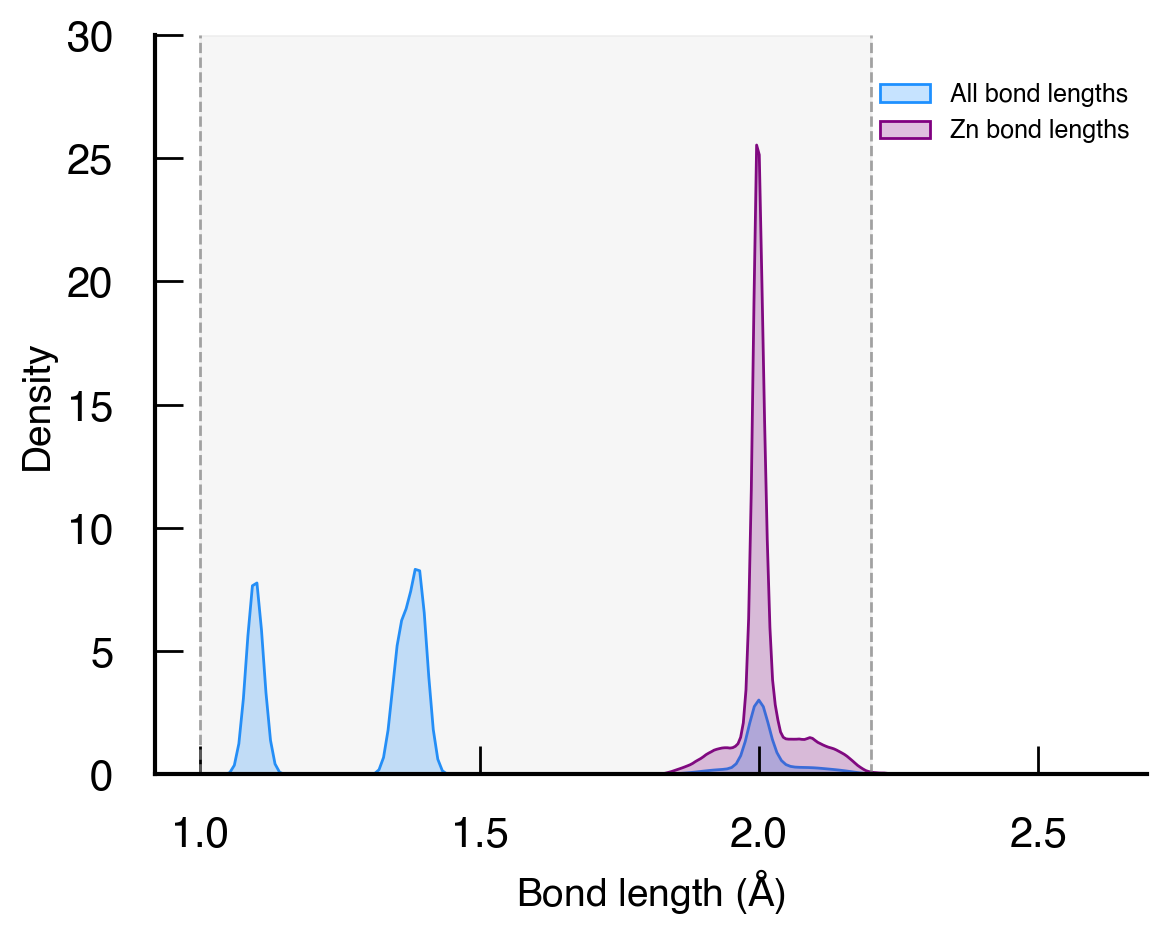

In [12]:
sns.kdeplot(all_bond_lengths,fill=True,color='dodgerblue',label='All bond lengths')
sns.kdeplot(zn_n_bond_lengths,fill=True,color='purple',label='Zn bond lengths')
plt.legend()

plt.xlabel('Bond length ($\mathrm{\AA}$)',fontsize=14)
plt.ylabel('Density',fontsize=14)
# move legend to the right

plt.vlines(1.0,0,30,linestyle='--',color='grey',alpha=0.7,linewidth=1)
plt.vlines(2.2,0,30,linestyle='--',color='grey',alpha=0.7,linewidth=1)
plt.ylim(0,30)
plt.legend(loc='upper right',fontsize=9,bbox_to_anchor=(1.03, 1),frameon=False)

# fill between the two horizontal lines
plt.fill_between([1,2.2],0,30,color='grey',alpha=0.07)

# remove the top and right spines
sns.despine()
# plt.savefig('../figures/bond_length_distributions_noShading.pdf',bbox_inches='tight')